In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#save ids for submission file
ids = test["PassengerId"]

train.head()
print(train.shape)

(8693, 14)


# Feature Engineering

In [3]:
# Drop passenger id
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

In [4]:
# Cabin consists of deck/num/side. Let us derive those values, and drop the cabin feature
cabin_train = train['Cabin'].str.split("/", n=2, expand=True)

train['deck'] = cabin_train[0]
train['num'] = cabin_train[1]
train['side'] = cabin_train[2]

# for test
cabin_test = test['Cabin'].str.split("/", n=2, expand=True)

test['deck'] = cabin_test[0]
test['num'] = cabin_test[1]
test['side'] = cabin_test[2]

In [5]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [6]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Name          8493 non-null   object 
 11  Transported   8693 non-null   bool   
 12  deck          8494 non-null   object 
 13  num           8494 non-null   object 
 14  side          8494 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [8]:
train['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

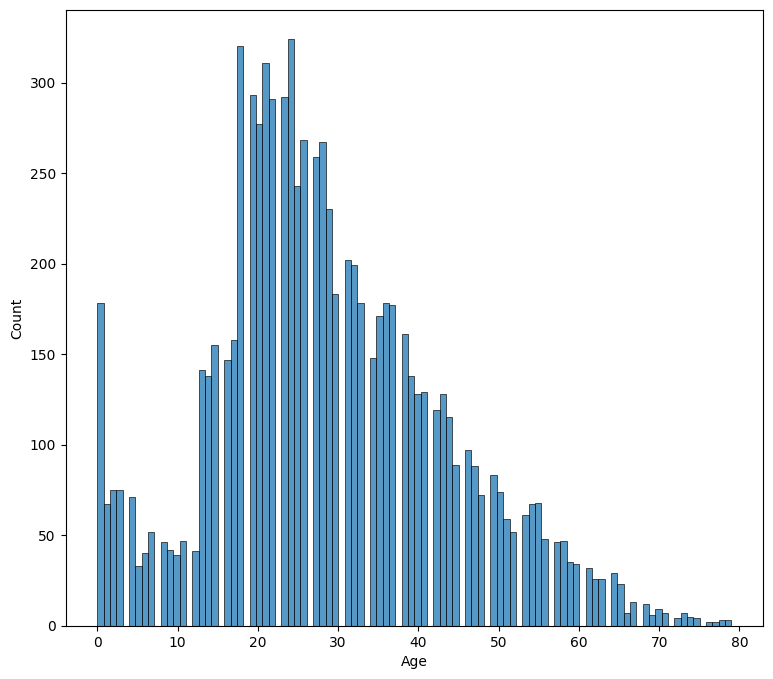

In [9]:
plt.figure(figsize=(9, 8))

sns.histplot(train['Age'], bins=100)

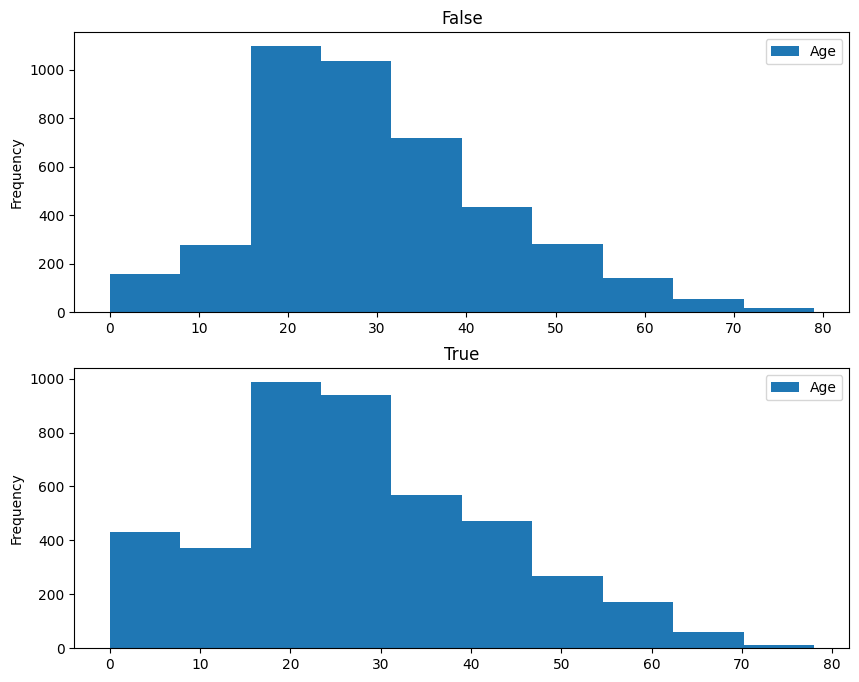

In [10]:
ax = train.plot.hist(column=["Age"], by="Transported", figsize=(10, 8))

In [11]:
# We can bucket the Age in groups of 10s
bins= [0,10,20,30,40,50,60,70,80,90]
labels = ['1s','10s','20s','30s','40s','50s','60s','70s','80s']

train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

In [12]:
# Drop the Age column
train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)

In [13]:
# Drop the Name column as it does not add any value to our model
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

train.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,AgeGroup
0,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,30s
1,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,20s
2,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,50s
3,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,30s
4,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,10s


In [14]:
# Replace bool values with 0-false, 1-true

col = ["CryoSleep","VIP"]

for i in col:
  train[i] = train[i].apply(lambda x:1 if x == True else 0)
  test[i] = test[i].apply(lambda x: 1 if x == True else 0)

In [15]:
train.Transported=train.Transported.apply(lambda x: 1 if x == True else 0)
train.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,AgeGroup
0,Europa,0,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P,30s
1,Earth,0,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S,20s
2,Europa,0,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,50s
3,Europa,0,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,30s
4,Earth,0,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S,10s


In [16]:
# Find null values in training dataset
print(train.info())
train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8492 non-null   object  
 1   CryoSleep     8693 non-null   int64   
 2   Destination   8511 non-null   object  
 3   VIP           8693 non-null   int64   
 4   RoomService   8512 non-null   float64 
 5   FoodCourt     8510 non-null   float64 
 6   ShoppingMall  8485 non-null   float64 
 7   Spa           8510 non-null   float64 
 8   VRDeck        8505 non-null   float64 
 9   Transported   8693 non-null   int64   
 10  deck          8494 non-null   object  
 11  num           8494 non-null   object  
 12  side          8494 non-null   object  
 13  AgeGroup      8514 non-null   category
dtypes: category(1), float64(5), int64(3), object(5)
memory usage: 891.9+ KB
None


HomePlanet      201
CryoSleep         0
Destination     182
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
deck            199
num             199
side            199
AgeGroup        179
dtype: int64

In [17]:
# Find null values in test dataset
print(test.info())
test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    4190 non-null   object  
 1   CryoSleep     4277 non-null   int64   
 2   Destination   4185 non-null   object  
 3   VIP           4277 non-null   int64   
 4   RoomService   4195 non-null   float64 
 5   FoodCourt     4171 non-null   float64 
 6   ShoppingMall  4179 non-null   float64 
 7   Spa           4176 non-null   float64 
 8   VRDeck        4197 non-null   float64 
 9   deck          4177 non-null   object  
 10  num           4177 non-null   object  
 11  side          4177 non-null   object  
 12  AgeGroup      4186 non-null   category
dtypes: category(1), float64(5), int64(2), object(5)
memory usage: 405.6+ KB
None


HomePlanet       87
CryoSleep         0
Destination      92
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
deck            100
num             100
side            100
AgeGroup         91
dtype: int64

In [18]:
# For categorical features- HomePlanet, Destination, group, deck, num, side, AgeGroup, let us replace the null values with the mode
null_cols_cat = ['HomePlanet', 'Destination', 'deck', 'num', 'side', 'AgeGroup']

for col in null_cols_cat:
  train[col].fillna(train[col].mode()[0], inplace=True)
  test[col].fillna(test[col].mode()[0], inplace=True)


In [19]:
# For numerical features- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, replace the null values with the median
null_cols_num = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in null_cols_num:
  train[col].fillna(train[col].median(), inplace=True)
  test[col].fillna(test[col].median(), inplace=True)

In [20]:
# Final verification of null values
print(train.isna().sum())
print(test.isna().sum())

HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
deck            0
num             0
side            0
AgeGroup        0
dtype: int64
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
deck            0
num             0
side            0
AgeGroup        0
dtype: int64


In [21]:
test.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side,AgeGroup
0,Earth,1,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,G,3,S,20s
1,Earth,0,TRAPPIST-1e,0,0.0,9.0,0.0,2823.0,0.0,F,4,S,10s
2,Europa,1,55 Cancri e,0,0.0,0.0,0.0,0.0,0.0,C,0,S,30s
3,Europa,0,TRAPPIST-1e,0,0.0,6652.0,0.0,181.0,585.0,C,1,S,30s
4,Earth,0,TRAPPIST-1e,0,10.0,0.0,635.0,0.0,0.0,F,5,S,20s


In [22]:
# Label encode categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in null_cols_cat:
    train[col] = label_encoder.fit_transform(train[col])

    test[col] = label_encoder.fit_transform(test[col])

In [23]:
train.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,AgeGroup
0,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,3
1,0,0,2,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1,2
2,1,0,2,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,5
3,1,0,2,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,3
4,0,0,2,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1,0


In [24]:
test.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side,AgeGroup
0,0,1,2,0,0.0,0.0,0.0,0.0,0.0,6,820,1,2
1,0,0,2,0,0.0,9.0,0.0,2823.0,0.0,5,927,1,0
2,1,1,0,0,0.0,0.0,0.0,0.0,0.0,2,0,1,3
3,1,0,2,0,0.0,6652.0,0.0,181.0,585.0,2,1,1,3
4,0,0,2,0,10.0,0.0,635.0,0.0,0.0,5,1029,1,2


# Model Building

In [25]:
# Model evaluation
from sklearn import metrics

def model_metrics(prediction, model):

  # Model Accuracy, how often is the classifier correct?
  print(f"{model} Accuracy:",metrics.accuracy_score(y_test, prediction))
  print("\n")

  # confusion matrix
  cm= metrics.confusion_matrix(y_test, prediction)
  cm_dis = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
  cm_dis.plot()
  plt.show()

  classx= metrics.classification_report(y_test, prediction)
  print("\n")
  print(f"{model} Classification Report:\n", classx)

In [26]:
X = train.drop('Transported', axis=1)
y = train['Transported']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

XGBoost Accuracy: 0.7910276073619632




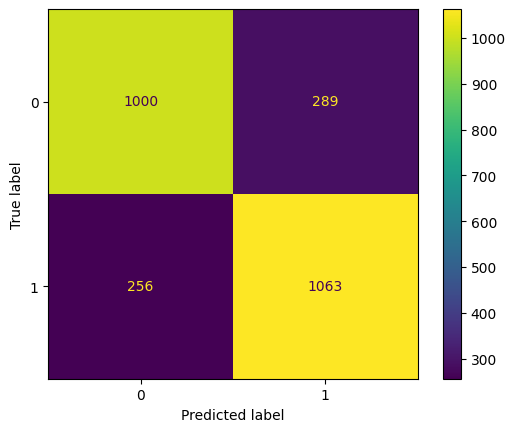



XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1289
           1       0.79      0.81      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



In [28]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(verbosity=0)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

model_metrics(y_pred_xgb, 'XGBoost')

Naive Bayes Accuracy: 0.7653374233128835




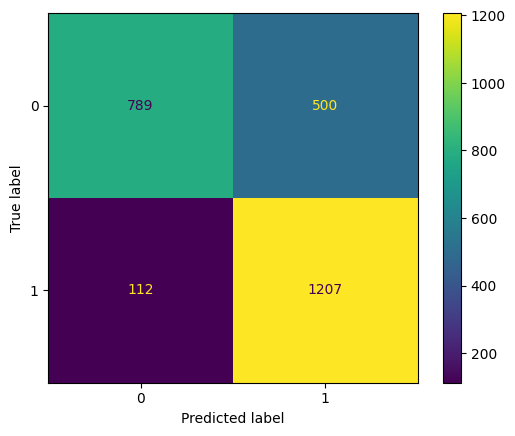



Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.61      0.72      1289
           1       0.71      0.92      0.80      1319

    accuracy                           0.77      2608
   macro avg       0.79      0.76      0.76      2608
weighted avg       0.79      0.77      0.76      2608



In [29]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

navies = MultinomialNB()
navies.fit(X_train,y_train)

y_pred_nb=navies.predict(X_test)

model_metrics(y_pred_nb, 'Naive Bayes')

Random Forest Accuracy: 0.8799846625766872




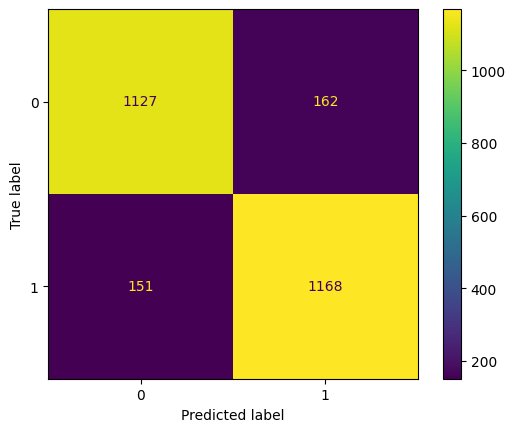



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      1289
           1       0.88      0.89      0.88      1319

    accuracy                           0.88      2608
   macro avg       0.88      0.88      0.88      2608
weighted avg       0.88      0.88      0.88      2608



In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier(n_estimators= 100,min_samples_split=10,
                              min_samples_leaf= 4,max_features="sqrt",max_depth= None)
rand.fit(X,y)

y_pred_rf = rand.predict(X_test)

model_metrics(y_pred_rf, 'Random Forest')

Todo -
hyperparameter tuning
voting
kaggle submission file

In [31]:
# Voting Classifiers
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

estimator = []

estimator.append(('LR', LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('XGB', XGBClassifier()))
estimator.append(('NB', MultinomialNB()))

In [32]:
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred_vot = vot_soft.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.7879601226993865




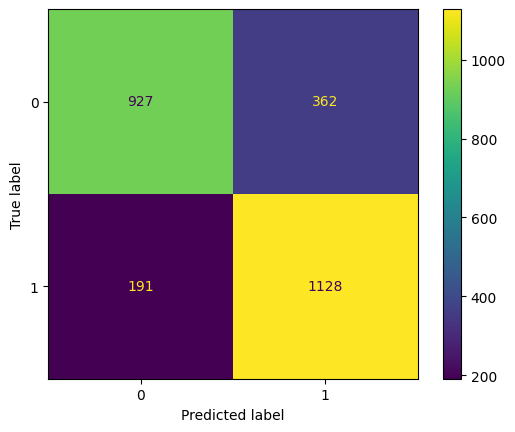



Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77      1289
           1       0.76      0.86      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



In [33]:
#Model evaluation
model_metrics(y_pred_vot, 'Voting Classifier')

Random Forest gave us the best accuracy. Let us do a cross validation of Random Forest to determine the optimal hyperparameters.

In [34]:
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train, y_train)

In [35]:
#CV_rfc.best_params_

In [36]:
# Model using the best random forest parameters
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')
rfc1.fit(X_train, y_train)

y_pred_rf_best=rfc1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Grid Searched Random Forest Accuracy: 0.7891104294478528




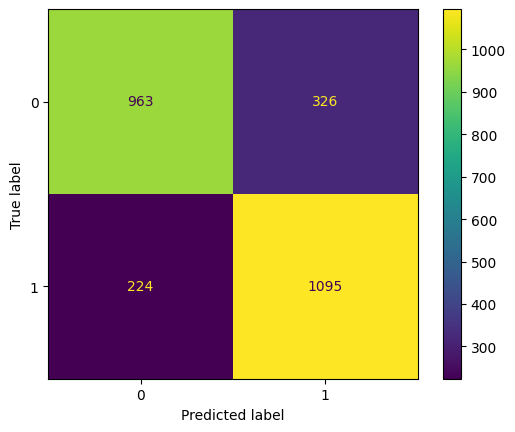



Grid Searched Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      1289
           1       0.77      0.83      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



In [37]:
# Model evaluation
model_metrics(y_pred_rf_best, 'Grid Searched Random Forest')

In [38]:
print(ids.shape)

print(test.shape)

(4277,)
(4277, 13)


In [39]:
# Kaggle submission using random forests based on grid search
y_pred_rf_sub=rfc1.predict(test)

submission_rf_best = pd.DataFrame({"PassengerId": ids, "Transported": y_pred_rf_sub})

# convert the numericals back to boolean
submission_rf_best.Transported=submission_rf_best.Transported.apply(lambda x: True if x == 1 else False)

submission_rf_best.to_csv('submission_rf_best.csv', index=False)

In [40]:
# Kaggle submission using random forests based on one of the previous models
y_pred_rf_sub2=rand.predict(test)

submission_rf_best = pd.DataFrame({"PassengerId": ids, "Transported": y_pred_rf_sub2})

# convert the numericals back to boolean
submission_rf_best.Transported=submission_rf_best.Transported.apply(lambda x: True if x == 1 else False)

submission_rf_best.to_csv('submission_rf_best2.csv', index=False)

# The kaggle submission using the random forest predictions based on the parameters determined by GridSearchCV proved to be the best.

In [46]:
# use the random forest prediction to predict a new label
X_test.head(1)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side,AgeGroup
304,2,0,2,0,417.0,349.0,634.0,3.0,1057.0,5,1408,1,0


In [97]:
new_test_array = np.array([[2,0,2,0,500.0,359.0,333.0,3.0,1000.0,5,1200,1,1]])
new_test_df = pd.DataFrame(new_test_array, columns=['HomePlanet',	'CryoSleep',	'Destination',	'VIP',	'RoomService'	,'FoodCourt'	,'ShoppingMall',	'Spa',	'VRDeck',	'deck',	'num'	,'side',	'AgeGroup'])
print(new_test_df)

   HomePlanet  CryoSleep  Destination  VIP  RoomService  FoodCourt  \
0         2.0        0.0          2.0  0.0        500.0      359.0   

   ShoppingMall  Spa  VRDeck  deck     num  side  AgeGroup  
0         333.0  3.0  1000.0   5.0  1200.0   1.0       1.0  


In [98]:
new_test_pred = rand.predict(new_test_df)
new_test_pred

array([0])

In [62]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=

In [99]:
import gradio as gr

with gr.Blocks() as demo:
  HomePlanet = gr.Number(label="HomePlanet")
  CryoSleep = gr.Number(label="CryoSleep")
  Destination = gr.Number(label="Destination")
  VIP = gr.Number(label="VIP")
  RoomService = gr.Number(label="RoomService")
  FoodCourt = gr.Number(label="FoodCourt")
  ShoppingMall = gr.Number(label="ShoppingMall")
  Spa = gr.Number(label="Spa")
  VRDeck = gr.Number(label="VRDeck")
  deck = gr.Number(label="deck")
  num = gr.Number(label="num")
  side = gr.Number(label="side")
  AgeGroup = gr.Number(label="AgeGroup")

  with gr.Row():
    predict_btn = gr.Button("Predict")

  prediction = gr.Number(label="Prediction")

  def predict(num1, num2, num3, num4, num5, num6, num7, num8, num9, num10, num11, num12, num13):
    np_array = create_array([[num1, num2, num3, num4, num5, num6, num7, num8, num9, num10, num11, num12, num13]])
    df = pd.DataFrame(np_array, columns=['HomePlanet',	'CryoSleep',	'Destination',	'VIP',	'RoomService'	,'FoodCourt'	,'ShoppingMall',	'Spa',	'VRDeck',	'deck',	'num'	,'side',	'AgeGroup'])
    prediction = rand.predict(df)
    return prediction

  def create_array(numbers):
    # Convert the list of numbers to a NumPy array
    array = np.array(numbers)
    return array

  predict_btn.click(predict, inputs=[HomePlanet, CryoSleep,	Destination,	VIP,	RoomService	,FoodCourt	,ShoppingMall,	Spa,	VRDeck,	deck,	num	,side,	AgeGroup], outputs=prediction)

demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://af83c0870ad5301c93.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7870 <> https://af83c0870ad5301c93.gradio.live


In [100]:
gradio deploy

SyntaxError: invalid syntax (<ipython-input-100-1ccd82e57bfd>, line 1)